In [2]:
# importting dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
lung=pd.read_csv('/content/drive/My Drive/Colab Notebooks/(ongoing)lung cancer/lungcancer.csv')
lung.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [3]:
#info
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [5]:
# statistical data
lung.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,59.0,42.627119,16.235230,18.0,29.0,39.0,55.0,77.0
Smokes,59.0,15.067797,7.984607,0.0,10.0,15.0,20.0,34.0
AreaQ,59.0,5.203390,2.461984,1.0,3.0,5.0,7.5,10.0
Alkhol,59.0,3.237288,2.380517,0.0,1.0,3.0,5.0,8.0
Result,59.0,0.474576,0.503640,0.0,0.0,0.0,1.0,1.0


In [6]:
# dropping not needed columns
lung.drop(['Name','Surname'], axis=1, inplace=True)

In [7]:
lung.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [8]:
#eda and visualization

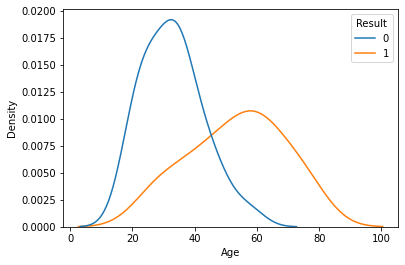

In [11]:
#kdeplots with results
sns.kdeplot(lung['Age'], hue=lung['Result'])

In [20]:
lung.groupby('Result')['Age'].mean()

Result
0    32.870968
1    53.428571
Name: Age, dtype: float64

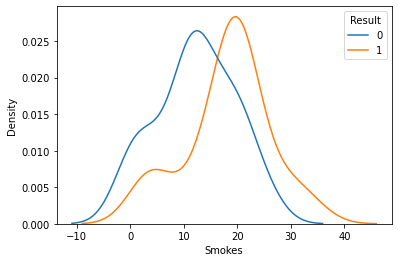

In [17]:
#smokes with result (how many smokes in a day)
sns.kdeplot(lung['Smokes'], hue=lung['Result'])

In [21]:
lung.groupby('Result')['Smokes'].mean()

Result
0    12.258065
1    18.178571
Name: Smokes, dtype: float64

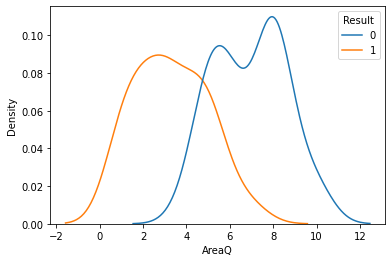

In [22]:
#areaq with result (area of cancer)
sns.kdeplot(lung['AreaQ'], hue=lung['Result'])

In [23]:
lung.groupby('Result')['AreaQ'].mean()

Result
0    6.935484
1    3.285714
Name: AreaQ, dtype: float64

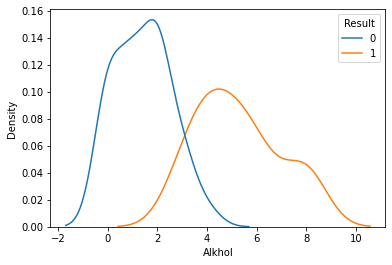

In [25]:
#alcohol with results (250ml unit and there is number of unit)
sns.kdeplot(lung['Alkhol'], hue=lung['Result'])

In [26]:
lung.groupby('Result')['Alkhol'].mean()

Result
0    1.419355
1    5.250000
Name: Alkhol, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


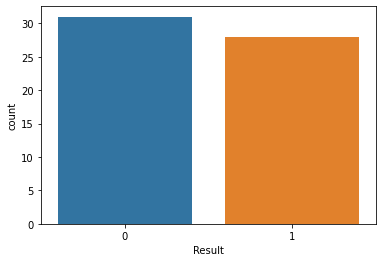

In [27]:
sns.countplot(lung['Result'])

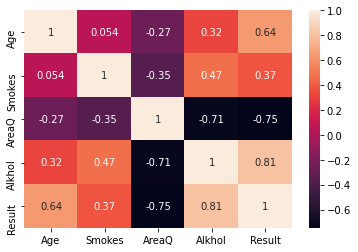

In [28]:
sns.heatmap(lung.corr(), annot=True)

In [29]:
# model building

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
y=lung['Result']
X=lung.drop('Result', axis=1)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X_train,y_train)
y_pred_lor=lor.predict(X_test)
score_lor=cross_val_score(lor,X,y, cv=5)
print(score_lor)

[0.83333333 1.         1.         1.         1.        ]


In [46]:
score_lor.mean()

0.9666666666666668

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
score_dtc=cross_val_score(dtc,X,y, cv=5)
print(score_dtc)

[0.83333333 0.83333333 1.         0.91666667 0.90909091]


In [37]:
score_dtc.mean()

0.8984848484848484

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
score_rfc=cross_val_score(rfc,X,y, cv=5)
print(score_rfc)

[0.91666667 1.         1.         0.91666667 0.90909091]


In [38]:
score_rfc.mean()

0.9484848484848485

In [39]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
score_svc=cross_val_score(svc,X,y, cv=5)
print(score_svc)

[0.58333333 1.         1.         1.         0.90909091]


In [40]:
score_svc.mean()

0.8984848484848484

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
score_knn=cross_val_score(knn,X,y, cv=5)
print(score_knn)

[0.58333333 1.         0.91666667 1.         0.90909091]


In [42]:
score_knn.mean()

0.8818181818181818

In [44]:
#hence best ML algo for this dataset is Logistic regression with accuracy greater than 96%

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
report_lor=classification_report(y_test,y_pred_lor)
print(report_lor)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



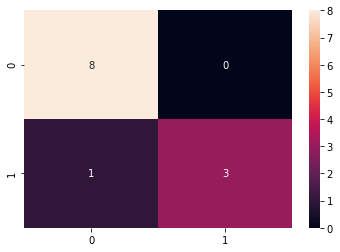

In [50]:
cm=confusion_matrix(y_test,y_pred_lor)
sns.heatmap(cm, annot=True)

0.875


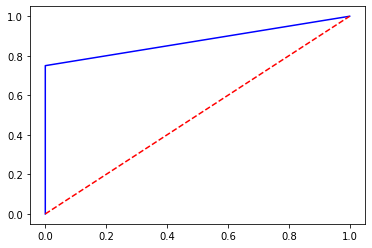

In [64]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold=roc_curve(y_test,y_pred_lor)
roc_auc=auc(fpr,tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
print(roc_auc)